### Random Forest 
- Alternative to CNN for emotion classification
- Calculating additional distance-based features for each emotional class
- Code for webcam footage adapted from https://git.arts.ac.uk/lmccallum/STEM-4-Creatives-22-23/blob/main/STEM-Week-7-Video.ipynb

In [2]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report
#from sklearn.preprocessing import StandardScaler

df =pd.read_csv('/Users/nixi/Desktop/Final-thesis-folder-24/AI-for-Media-project-23-24/facial_landmarks_data.csv')

#print(df.head())
# NaN values present, string format, requires removal.
df.dropna(subset=['EyesX', 'EyesY', 'NoseX', 'NoseY', 'MouthX', 'MouthY'], inplace=True)

eyes_x = df['EyesX'].apply(lambda x: list(map(float, x.strip('[]').split(','))))
eyes_y = df['EyesY'].apply(lambda x: list(map(float, x.strip('[]').split(','))))

nose_x = df['NoseX']
nose_y = df['NoseY']

mouth_x = df['MouthX'].apply(lambda x: list(map(float, x.strip('[]').split(','))))
mouth_y = df['MouthY'].apply(lambda x: list(map(float, x.strip('[]').split(','))))

print(df.head())

                               Image  EmotionClass  TotalFaceArea  \
0   pinterest_370491506865098460.png  neutral-face           9801   
1   pinterest_370491506865098460.png  neutral-face          30976   
2  pinterest_1105774514751655987.jpg  neutral-face          47524   
3  pinterest_1105774514751655978.jpg  neutral-face          77284   
4    pinterest_31806741112770968.jpg  neutral-face          16384   

                                               EyesX  \
0  [775, 778, 782, 787, 782, 777, 809, 813, 819, ...   
1  [366, 375, 386, 393, 385, 375, 432, 441, 450, ...   
2  [104, 113, 125, 135, 124, 112, 188, 196, 208, ...   
3  [173, 187, 203, 216, 201, 185, 283, 298, 314, ...   
4  [438, 443, 448, 453, 448, 443, 476, 480, 485, ...   

                                               EyesY  \
0   [51, 49, 49, 52, 53, 53, 53, 51, 51, 53, 55, 55]   
1   [74, 70, 70, 78, 79, 78, 81, 75, 76, 82, 84, 83]   
2  [224, 218, 217, 223, 228, 229, 217, 207, 204, ...   
3  [241, 234, 235, 246, 

In [3]:
# Calculates the distances and angles between eye, nose and mouth  landmarkings
eyes_x = df['EyesX'].apply(lambda x: list(map(float, x.strip('[]').split(','))))
eyes_y = df['EyesY'].apply(lambda x: list(map(float, x.strip('[]').split(','))))

# Extract the first value from the NoseX and NoseY lists
nose_x = df['NoseX'].apply(lambda x: np.mean(list(map(float, x.strip('[]').split(',')))))
nose_y = df['NoseY'].apply(lambda x: np.mean(list(map(float, x.strip('[]').split(',')))))

mouth_x = df['MouthX'].apply(lambda x: list(map(float, x.strip('[]').split(','))))
mouth_y = df['MouthY'].apply(lambda x: list(map(float, x.strip('[]').split(','))))

# Calculate Distances
df['EyesDist'] = np.sqrt((eyes_x.apply(lambda x: x[0]) - eyes_x.apply(lambda x: x[1]))**2 + 
                         (eyes_y.apply(lambda x: x[0]) - eyes_y.apply(lambda x: x[1]))**2)

df['EyesToNoseDist'] = np.sqrt((((eyes_x.apply(lambda x: np.mean(x))) - nose_x)**2) + 
                               (((eyes_y.apply(lambda x: np.mean(x))) - nose_y)**2))

df['NoseToMouthDist'] = np.sqrt((nose_x - mouth_x.apply(lambda x: np.mean(x)))**2 + 
                                (nose_y - mouth_y.apply(lambda x: np.mean(x)))**2)

# Calculate Angles
df['MouthAngle'] = np.degrees(np.arctan2(mouth_y.apply(lambda x: x[0] - x[1]), 
                                         mouth_x.apply(lambda x: x[0] - x[1])))

df['NoseAngle'] = np.degrees(np.arctan2(nose_y - eyes_y.apply(lambda x: np.mean(x)), 
                                        nose_x - eyes_x.apply(lambda x: np.mean(x))))

df['EyesToMouthAngle'] = np.degrees(np.arctan2(mouth_y.apply(lambda x: np.mean(x)) - eyes_y.apply(lambda x: np.mean(x)), 
                                               mouth_x.apply(lambda x: np.mean(x)) - eyes_x.apply(lambda x: np.mean(x))))

# Display the first few rows of the resulting DataFrame
print(df[['EyesDist', 'EyesToNoseDist', 'NoseToMouthDist', 'MouthAngle', 'NoseAngle', 'EyesToMouthAngle']].head())


    EyesDist  EyesToNoseDist  NoseToMouthDist  MouthAngle   NoseAngle  \
0   3.605551       20.639936        25.254010  135.000000  109.824995   
1   9.848858       42.267029        41.293348  156.801409   73.977020   
2  10.816654       45.072935        44.266127  142.125016   85.227561   
3  15.652476       56.260261        70.744244  158.198591   92.461905   
4   5.830952       18.875736        29.232228  150.255119   89.494090   

   EyesToMouthAngle  
0         98.342496  
1         85.123133  
2         82.302802  
3         90.346057  
4         90.575718  


In [4]:
# Save data to csv sheet
df.to_csv('facial_landmarks_dataversion2.csv', index=False)


In [5]:
import pandas as pd
import numpy as np
from ast import literal_eval

# Load your CSV file
df = pd.read_csv('facial_landmarks_dataversion2.csv')

# Apply literal_eval to coordinate columns, handling NaN values
coord_columns = ['EyesX', 'EyesY', 'NoseX', 'NoseY', 'MouthX', 'MouthY']
for col in coord_columns:
    df[col] = df[col].apply(lambda x: literal_eval(x) if pd.notna(x) else np.nan)

# Calculate the mean for each coordinate column
for col in coord_columns:
    df[f'{col}_mean'] = df[col].apply(np.mean)

# Convert TotalFaceArea to numeric
df['TotalFaceArea'] = pd.to_numeric(df['TotalFaceArea'], errors='coerce')

# Drop unnecessary columns
#df = df.drop(columns=['Path', 'NumFaces'] + coord_columns)

# Drop rows with NaN values in necessary columns
necessary_columns = ['EmotionClass', 'TotalFaceArea'] + [f'{col}_mean' for col in coord_columns]
df = df.dropna(subset=necessary_columns)

# Normalize the coordinates by the square root of the TotalFaceArea
df['sqrt_TotalFaceArea'] = np.sqrt(df['TotalFaceArea'])
for col in coord_columns:
    mean_col = f'{col}_mean'
    df[f'{mean_col}_normalized'] = df[mean_col] / df['sqrt_TotalFaceArea']

# Calculate additional features using normalized values
df['EyeToNose'] = np.sqrt((df['EyesX_mean_normalized'] - df['NoseX_mean_normalized'])**2 + 
                          (df['EyesY_mean_normalized'] - df['NoseY_mean_normalized'])**2)

df['EyeToMouth'] = np.sqrt((df['EyesX_mean_normalized'] - df['MouthX_mean_normalized'])**2 + 
                           (df['EyesY_mean_normalized'] - df['MouthY_mean_normalized'])**2)

df['NoseToMouth'] = np.sqrt((df['NoseX_mean_normalized'] - df['MouthX_mean_normalized'])**2 + 
                            (df['NoseY_mean_normalized'] - df['MouthY_mean_normalized'])**2)

df['EyeAspectRatio'] = np.abs(df['EyesX_mean_normalized'] - df['MouthX_mean_normalized']) / \
                       np.abs(df['EyesY_mean_normalized'] - df['MouthY_mean_normalized'])

print("DataFrame shape after preprocessing:", df.shape)


DataFrame shape after preprocessing: (4295, 32)


### Plots 
- Visualising the relationships between facial features and emotions


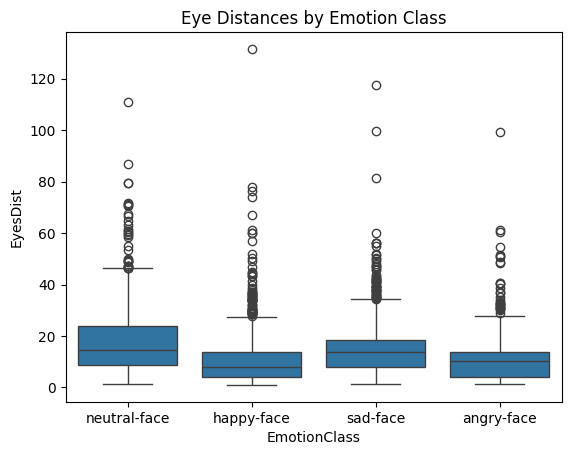

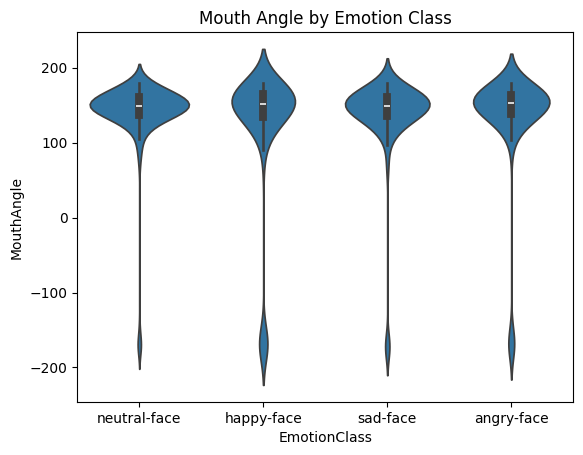

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_csv('cleaned_facial_landmarks_data.csv')

sns.boxplot(x='EmotionClass', y='EyesDist', data=df)
plt.title('Eye Distances by Emotion Class')
plt.show()

# Violin plot of Mouth Angle by Emotion Class
sns.violinplot(x='EmotionClass', y='MouthAngle', data=df)
plt.title('Mouth Angle by Emotion Class')
plt.show()

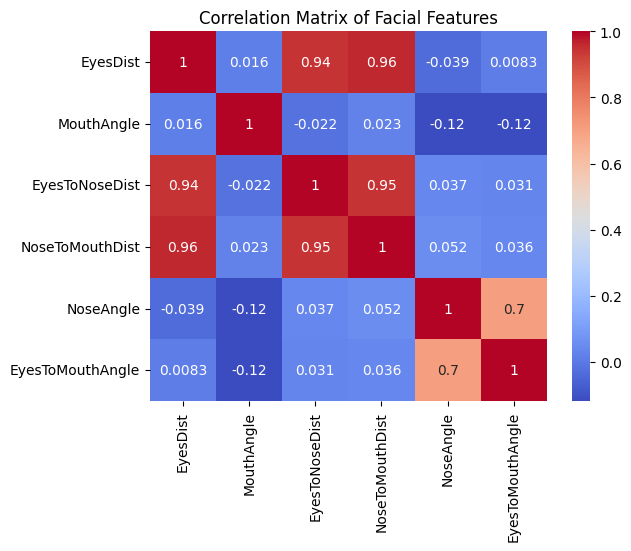

In [7]:
# All data ( every emotional class) for a general picture
corr_matrix = df[['EyesDist', 'MouthAngle', 'EyesToNoseDist', 'NoseToMouthDist', 'NoseAngle', 'EyesToMouthAngle']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Facial Features')
plt.show()

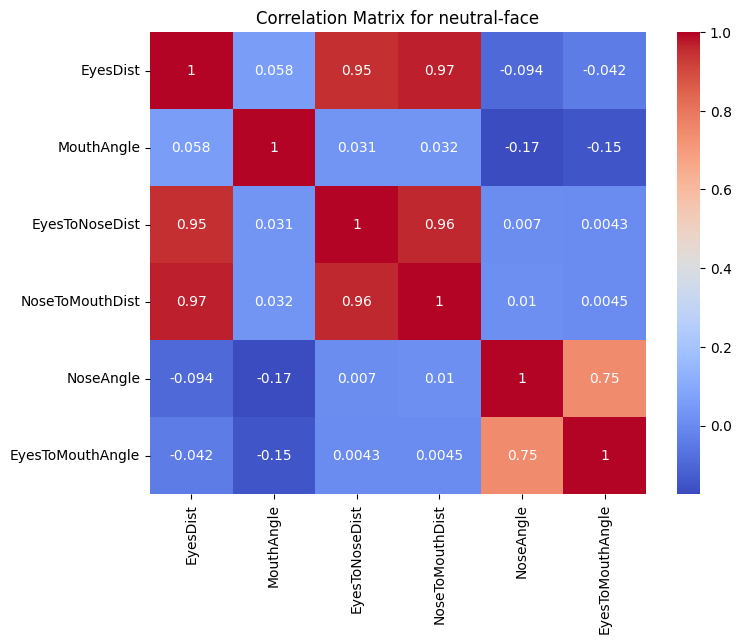

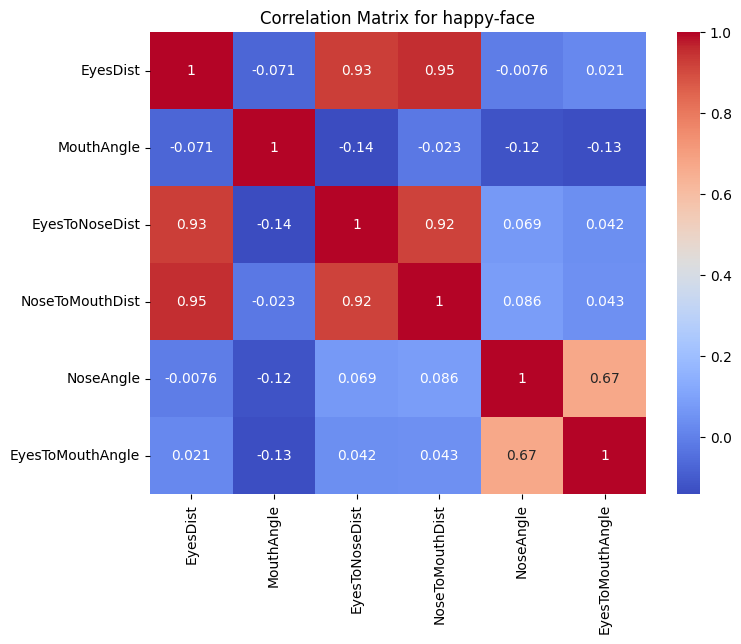

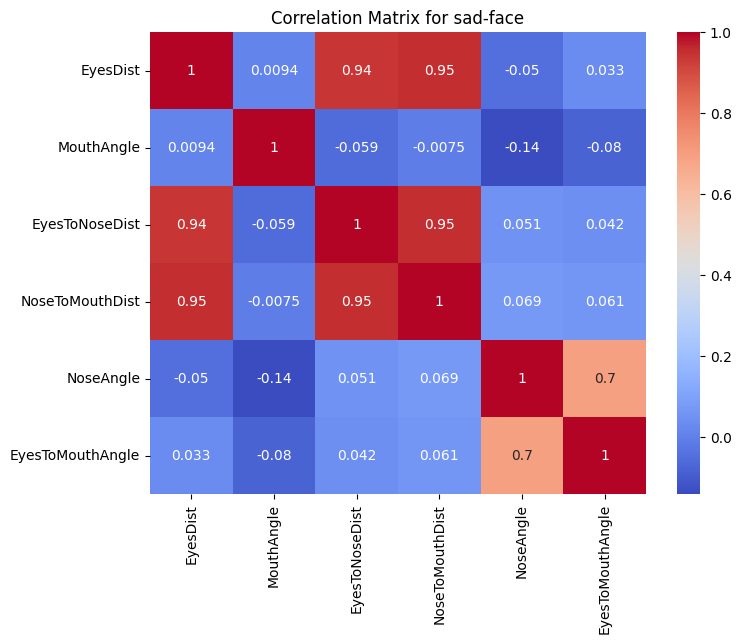

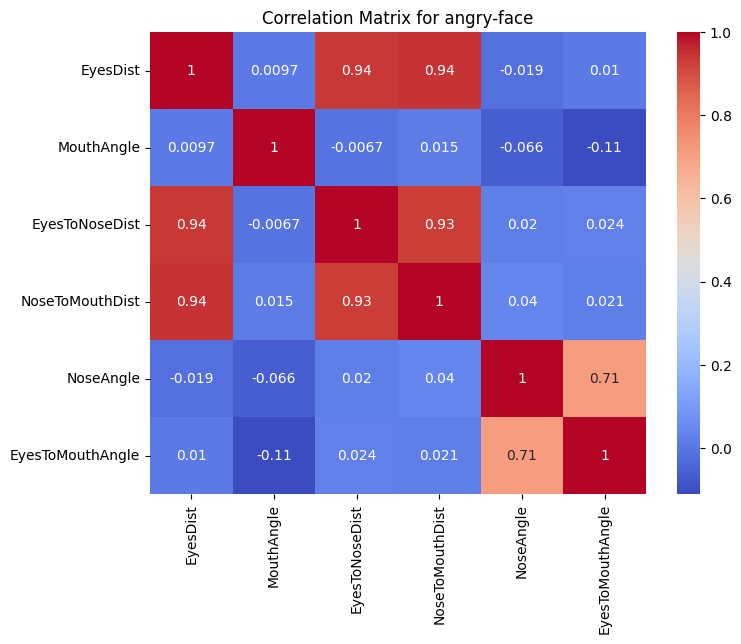

In [8]:
emotions = df['EmotionClass'].unique()

# Plot heatmap for each emotion
for emotion in emotions:
    plt.figure(figsize=(8, 6))
    subset = df[df['EmotionClass'] == emotion]
    corr_matrix = subset[['EyesDist', 'MouthAngle', 'EyesToNoseDist', 'NoseToMouthDist', 'NoseAngle', 'EyesToMouthAngle']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {emotion}')
    plt.show()


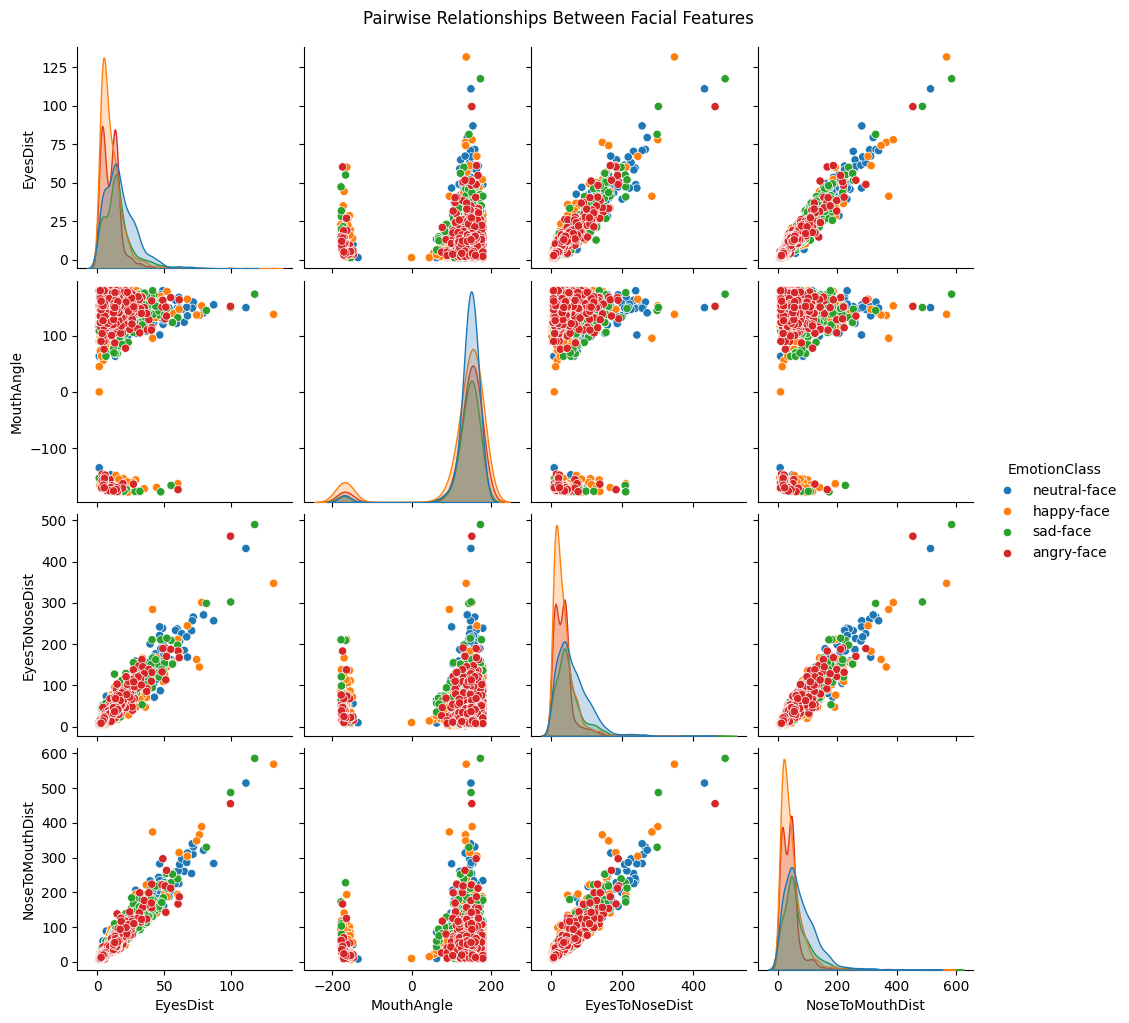

In [9]:
sns.pairplot(df, hue='EmotionClass', vars=['EyesDist', 'MouthAngle', 'EyesToNoseDist', 'NoseToMouthDist'])
plt.suptitle('Pairwise Relationships Between Facial Features', y=1.02)
plt.show()

### Normalization and statistics

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from ast import literal_eval

# Load your CSV file
df = pd.read_csv('/Users/nixi/Desktop/Final-thesis-folder-24/AI-for-Media-project-23-24/facial_landmarks_dataversion2.csv')

# Convert string representations of lists into actual lists
for col in ['EyesX', 'EyesY', 'NoseX', 'NoseY', 'MouthX', 'MouthY']:
    df[col] = df[col].apply(lambda x: literal_eval(x) if isinstance(x, str) else np.nan)

# Compute the mean of the lists
for col in ['EyesX', 'EyesY', 'NoseX', 'NoseY', 'MouthX', 'MouthY']:
    df[f'{col}_mean'] = df[col].apply(lambda x: np.mean(x) if isinstance(x, list) else np.nan)

# Convert TotalFaceArea to numeric and drop rows with NaN values
df['TotalFaceArea'] = pd.to_numeric(df['TotalFaceArea'], errors='coerce')
necessary_columns = ['EmotionClass', 'TotalFaceArea'] + [f'{col}_mean' for col in ['EyesX', 'EyesY', 'NoseX', 'NoseY', 'MouthX', 'MouthY']]
df = df.dropna(subset=necessary_columns)

# Calculate distances
df['EyeToNose'] = np.sqrt((df['EyesX_mean'] - df['NoseX_mean'])**2 + (df['EyesY_mean'] - df['NoseY_mean'])**2)
df['EyeToMouth'] = np.sqrt((df['EyesX_mean'] - df['MouthX_mean'])**2 + (df['EyesY_mean'] - df['MouthY_mean'])**2)
df['NoseToMouth'] = np.sqrt((df['NoseX_mean'] - df['MouthX_mean'])**2 + (df['NoseY_mean'] - df['MouthY_mean'])**2)
df['EyeAspectRatio'] = np.abs(df['EyesX_mean'] - df['MouthX_mean']) / np.abs(df['EyesY_mean'] - df['MouthY_mean'])

# Normalize features by TotalFaceArea
df['EyeToNose_normalized'] = df['EyeToNose'] / df['TotalFaceArea']
df['EyeToMouth_normalized'] = df['EyeToMouth'] / df['TotalFaceArea']
df['NoseToMouth_normalized'] = df['NoseToMouth'] / df['TotalFaceArea']
df['EyeAspectRatio_normalized'] = df['EyeAspectRatio'] / df['TotalFaceArea']

# Select features for the model
features = ['EyeToNose_normalized', 'EyeToMouth_normalized', 'NoseToMouth_normalized', 'EyeAspectRatio_normalized']
X = df[features]
y = df['EmotionClass']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Print feature importances
for feature, importance in zip(features, rf_model.feature_importances_):
    print(f"{feature}: {importance}")


KeyboardInterrupt: 

/var/folders/1t/ywcqy6hd69g8pdsvmwf99pwh0000gn/T/ipykernel_68571/3539513995.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EmotionClass', y='Number of Images', data=class_counts, palette='viridis')


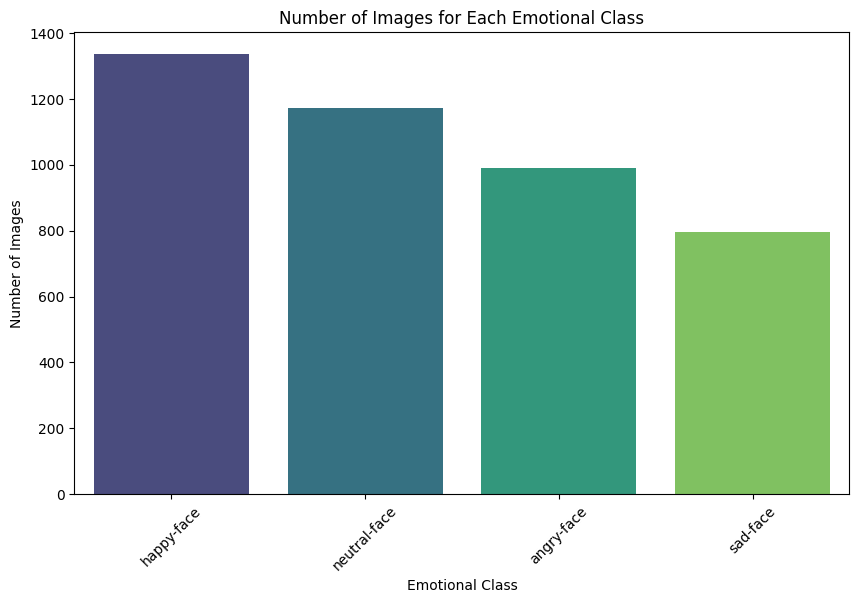

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('facial_landmarks_dataversion2.csv')

# Count the number of images for each emotional class
class_counts = df['EmotionClass'].value_counts().reset_index()
class_counts.columns = ['EmotionClass', 'Number of Images']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='EmotionClass', y='Number of Images', data=class_counts, palette='viridis')
plt.title('Number of Images for Each Emotional Class')
plt.xlabel('Emotional Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# Exclude 'Image' and 'EmotionClass' columns before scaling
numeric_columns = df.select_dtypes(include=[np.number]).columns
columns_to_exclude = ['EmotionClass', 'Image']
columns_to_drop = [col for col in columns_to_exclude if col in numeric_columns]
X = df[numeric_columns].drop(columns=columns_to_drop)

y = df['EmotionClass']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
predictions = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, predictions))

joblib.dump(rf_classifier, 'random_forest_model.pkl')  # Save model

              precision    recall  f1-score   support

  angry-face       0.51      0.45      0.48       181
  happy-face       0.57      0.77      0.65       282
neutral-face       0.57      0.50      0.53       250
    sad-face       0.46      0.32      0.37       146

    accuracy                           0.54       859
   macro avg       0.53      0.51      0.51       859
weighted avg       0.54      0.54      0.53       859



['random_forest_model.pkl']

### Predicting emotions from web camera footage using Random Forest

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import cv2
import joblib

def extract_features(landmarks):
    def calculate_total_face_area(landmarks):
        # Implement logic to calculate the total face area based on the landmarks
        total_face_area = int(landmarks['width']) * int(landmarks['height'])
        return total_face_area

    def calculate_eyes_distance(landmarks):
        # Implement logic to calculate the distance between eyes based on the landmarks
        eyes_distance = int(landmarks['eye2']) - int(landmarks['eye1'])
        return eyes_distance

    def calculate_nose_to_mouth_distance(landmarks):
        # Implement logic to calculate the distance between nose and mouth based on the landmarks
        nose_to_mouth_distance = int(landmarks['mouth']) - int(landmarks['nose'])
        return nose_to_mouth_distance
    
    total_face_area = calculate_total_face_area(landmarks)
    eyes_distance = calculate_eyes_distance(landmarks)
    nose_to_mouth_distance = calculate_nose_to_mouth_distance(landmarks)
    
    features = np.array([total_face_area, eyes_distance, nose_to_mouth_distance])
    return features

# Load the CSV file containing the data for each emotional class
df = pd.read_csv('/Users/nixi/Desktop/Final-thesis-folder-24/AI-for-Media-project-23-24/facial_landmarks_dataversion2.csv')

# Extract features and labels from the CSV data
X = df[['TotalFaceArea', 'EyesDist', 'EyesToNoseDist', 'NoseToMouthDist', 'MouthAngle', 'NoseAngle', 'EyesToMouthAngle']]
y = df['EmotionClass']

# Encode emotional classes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train a Random Forest model
rf_model = RandomForestClassifier()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
rf_model.fit(X_scaled, y_encoded)

# Save the trained model and scaler for later use
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    # Extract features from facial landmarks in the frame
    features = extract_features(frame)
    
    # Scale the features
    scaled_features = scaler.transform([features])
    
    # Make predictions using the Random Forest model
    predicted_class = rf_model.predict(scaled_features)
    
    # Decode the predicted class back to the original emotional class label
    predicted_emotion = label_encoder.inverse_transform(predicted_class)
    
    # Display the predicted emotion on the frame
    cv2.putText(frame, predicted_emotion[0], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    cv2.imshow('Emotion Prediction', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
import os
import warnings
import pandas as pd
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib
import mediapipe as mp

# Suppress TensorFlow and Mediapipe logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppresses TensorFlow warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")  # Suppress sklearn warnings

# Load the facial landmark data from the CSV file
df = pd.read_csv('/Users/nixi/Desktop/Final-thesis-folder-24/AI-for-Media-project-23-24/facial_landmarks_dataversion2.csv')

# Load Random Forest model and scaler
rf_model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Mediapipe setup for facial landmark detection
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5)

# Function to preprocess facial landmark data for prediction
def preprocess_features(features):
    scaled_features = scaler.transform([features])
    return scaled_features

# Function to extract the necessary facial landmarks from the frame
def extract_features(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_frame)

    if results.multi_face_landmarks:
        landmarks = results.multi_face_landmarks[0].landmark
        features = [landmarks[i].x for i in range(7)] + [landmarks[i].y for i in range(7)]  # Modify indices based on training
        return features[:7]
    else:
        return None

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    features = extract_features(frame)

    if features is not None:
        try:
            scaled_features = preprocess_features(features)
            predicted_emotion = rf_model.predict(scaled_features)
            cv2.putText(frame, predicted_emotion[0], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        except ValueError as e:
            print(f"Feature length mismatch: {e}")

    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1725725488.838091 1386100 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1725725488.854634 1387019 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725725488.863976 1387019 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725725490.767164 1387018 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.w

Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.
Feature length mismatch: X has 7 features, but StandardScaler is expecting 13 features as input.


: 

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Load the pre-trained Random Forest model and scaler
rf_model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Mediapipe setup for facial landmark detection
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5)

# Function to preprocess facial landmark data for prediction
def preprocess_features(features):
    scaled_features = scaler.transform([features])
    return scaled_features

# Function to extract facial landmarks and calculate features
def extract_features(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_frame)

    if results.multi_face_landmarks:
        landmarks = results.multi_face_landmarks[0].landmark

        # Extracting specific landmark positions
        left_eye = np.array([landmarks[33].x, landmarks[33].y])
        right_eye = np.array([landmarks[133].x, landmarks[133].y])
        nose_tip = np.array([landmarks[1].x, landmarks[1].y])
        mouth_center = np.array([(landmarks[13].x + landmarks[14].x) / 2, (landmarks[13].y + landmarks[14].y) / 2])

        # Calculate distances or ratios as features
        eye_to_nose = np.linalg.norm(left_eye - nose_tip)  # Feature 1
        eye_to_mouth = np.linalg.norm(left_eye - mouth_center)  # Feature 2
        nose_to_mouth = np.linalg.norm(nose_tip - mouth_center)  # Feature 3
        eye_aspect_ratio = np.linalg.norm(left_eye - right_eye) / (np.linalg.norm(nose_tip - mouth_center) + 1e-6)  # Feature 4
        
        # Add additional features to match the expected 7 features:
        left_eye_to_right_eye = np.linalg.norm(left_eye - right_eye)  # Feature 5
        nose_to_left_eye = np.linalg.norm(nose_tip - left_eye)  # Feature 6
        mouth_width = np.linalg.norm(np.array([landmarks[13].x, landmarks[13].y]) - np.array([landmarks[14].x, landmarks[14].y]))  # Feature 7

        # Combine features into a list
        features = [
            eye_to_nose, 
            eye_to_mouth, 
            nose_to_mouth, 
            eye_aspect_ratio,
            left_eye_to_right_eye,
            nose_to_left_eye,
            mouth_width
        ]
        return features
    else:
        return None

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Extract features from the webcam frame
    features = extract_features(frame)

    if features is not None:
        print("Extracted numerical features:", features)  # Debug: Print numerical features for verification
        try:
            # Preprocess the features using the loaded scaler
            scaled_features = preprocess_features(features)
            # Predict the emotion using the Random Forest model
            predicted_emotion = rf_model.predict(scaled_features)
            print("Predicted emotion:", predicted_emotion[0])  # Debug: Print the predicted emotion
            # Display the predicted emotion on the frame
            cv2.putText(frame, predicted_emotion[0], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        except ValueError as e:
            print(f"Feature length mismatch: {e}")

    # Display the frame with the predicted emotion
    cv2.imshow('Emotion Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


I0000 00:00:1725725040.515777 1380669 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1725725040.530808 1382266 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725725040.537391 1382266 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725725042.169614 1382264 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() w

Extracted numerical features: [0.12899562636620696, 0.1908567897768919, 0.06833177374782971, 0.598347304994239]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12655494482751967, 0.18924565865271342, 0.069416637484939, 0.5817665892251207]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12721029023148722, 0.18930006257853813, 0.06878380984227524, 0.5873434656099035]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12759244012144916, 0.18875257995255984, 0.06768056588227996, 0.5976422361400047]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.12667675055641936, 0.18927753527143315, 0.06921204974441095, 0.5819690479073105]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1271997421699764, 0.18953256014194683, 0.06874230571403588, 0.5823174937586005]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.12760386287821845, 0.19051379503284988, 0.06955464224637604, 0.5830075323082994]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1283184880359409, 0.19149885083689067, 0.06968154495983439, 0.5765426698980771]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12923153598346523, 0.19224685082513326, 0.06960800387824191, 0.5815116175417652]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1299234560442205, 0.1935547450099186, 0.07022105922926164, 0.5791898486539486]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12998559189275286, 0.19358892183664783, 0.0703422115810041, 0.5790260418220526]
Feature length mismatch: X has 4 features, but Sta

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.13026960160470422, 0.19237394792269014, 0.06877156546519665, 0.5932094510456785]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13084890766170976, 0.19270202060716765, 0.06853007748918583, 0.5947084893320007]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13093493884408078, 0.19327647553182653, 0.06896055915528182, 0.5927305990627605]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13070334653797025, 0.1932053328832939, 0.06912911015539826, 0.5907608084261607]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13150617737099798, 0.19414350851164497, 0.06915497831164182, 0.5902554138339738]
Feature length mismatch: X has 4 features, but 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.13036926148293143, 0.19342014402526403, 0.0695705817892808, 0.5848077341950132]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12982381914263544, 0.19372728090818853, 0.07044827789724568, 0.5769207303541233]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1282832601745901, 0.19246201309381206, 0.07078465703453397, 0.5699572544313731]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1280519451757382, 0.19130700071879894, 0.06993255884594293, 0.5770892923021015]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12858695940369588, 0.1883554198836181, 0.0663186701882534, 0.6107230570394505]
Feature length mismatch: X has 4 features, but Stan

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.1251261825443487, 0.17902829360526867, 0.06049528414113429, 0.6580175533661645]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12386763842539276, 0.17701040328623027, 0.05924326285192765, 0.6694563920227725]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12432693446107934, 0.1750076986547508, 0.056459743849971725, 0.6975919309819971]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12424089571603547, 0.175991011109136, 0.05797820749569801, 0.683120158787439]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12293228064573214, 0.1747371795889896, 0.05806292890186884, 0.6765276770203117]
Feature length mismatch: X has 4 features, but Stan

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.12178332528307387, 0.17308138523866343, 0.05772787838318932, 0.680728806591368]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12166067812966619, 0.17336948873783775, 0.05805413762442338, 0.6766901904034388]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12087862234996656, 0.17294576967962935, 0.05847681103427253, 0.6713757459668815]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11972800308277236, 0.17195511181592285, 0.05877406132425608, 0.6672908918586113]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11932357135263237, 0.17162055924730357, 0.058966725201013453, 0.663866475436955]
Feature length mismatch: X has 4 features, but 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11831034321825529, 0.17070254561809436, 0.05911301064994446, 0.6592872874455412]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1172520456632711, 0.16803417116641445, 0.05740615933102839, 0.6684883501020569]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11502088487931898, 0.16573673705243355, 0.05766259408517761, 0.6586769311970154]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11645124116014721, 0.16620817745506886, 0.05658615645241569, 0.6786311857358804]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11634152550504279, 0.16736962794664853, 0.05822993938012705, 0.6622723336510464]
Feature length mismatch: X has 4 features, but 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11738652444292197, 0.1689809657186771, 0.05848875133316549, 0.662106683745309]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11744064706392845, 0.16922518621217203, 0.05866009141530743, 0.662706081470271]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11812047507563128, 0.16934922804319008, 0.058257267706553026, 0.6707032652083573]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11885361316547624, 0.16988571429235594, 0.05774043203998609, 0.6747819327854846]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1182952323665481, 0.16998537342082268, 0.05875785346586031, 0.6643947486556417]
Feature length mismatch: X has 4 features, but St

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11906409383468285, 0.17020350665817782, 0.05798051167985219, 0.6727204212529636]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11870645471460535, 0.1699901520567082, 0.05813393130713158, 0.6695439369537666]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1174101407653189, 0.17549237175108465, 0.06597133242030988, 0.5956131345578889]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11741854875790221, 0.18103099434967335, 0.0714548481179542, 0.5536306259938857]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11609137770136224, 0.18251696885076313, 0.07437067156386715, 0.5281204775726207]
Feature length mismatch: X has 4 features, but St

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.1166808016558113, 0.1839566160497931, 0.07551290534716602, 0.5240977653576788]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11623693542973092, 0.1842311271414917, 0.07645327436715642, 0.5199589014711307]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1162259532919183, 0.18439725735503532, 0.07669805005887659, 0.5181979993835066]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11579890409844462, 0.18353688014977715, 0.0762653100521577, 0.520229899517661]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11543523817945618, 0.1834969231670612, 0.07659147577312794, 0.5154701573196632]
Feature length mismatch: X has 4 features, but Standa

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11569524519672178, 0.18315850934015437, 0.07596333770421591, 0.5209126347252574]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11583486074960614, 0.18258922693052002, 0.07530809499067602, 0.5259444637736341]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11547825996770607, 0.18171810711278708, 0.07473674826296062, 0.5279038936605532]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11523667026762899, 0.1811963165957819, 0.07442189304123219, 0.5299183543030923]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11520170794899409, 0.1815006564392064, 0.07464056735082514, 0.5272940019749811]
Feature length mismatch: X has 4 features, but S

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11494178917699588, 0.18153102366768986, 0.07480483306232184, 0.522635715858243]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1146082069658633, 0.1814882470385203, 0.07515569933832889, 0.5198328341299645]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11480661472820557, 0.18049163948236424, 0.07399981797191661, 0.5273756401678011]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1141821101195965, 0.18002206280183933, 0.07394476833482255, 0.5230193337965563]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11465191187612167, 0.1801401372949981, 0.07337710182286888, 0.5260179698466501]
Feature length mismatch: X has 4 features, but Stan

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11344251881947724, 0.17893032802182582, 0.07373086269172903, 0.525024526815116]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11425012083181764, 0.17964968290795263, 0.07366404811063564, 0.528335698319782]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11341729853420758, 0.17920037631233904, 0.07399923691305609, 0.5230771034228484]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.113779698667723, 0.1795790757095088, 0.07417278850705553, 0.5248163509020185]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11377880625534631, 0.18376800247147537, 0.07878099305876331, 0.4981580874069425]
Feature length mismatch: X has 4 features, but Stan

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11201700206002647, 0.18621763360075105, 0.08346240104942354, 0.4507365654766268]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11329940189612592, 0.18761946760368697, 0.08294603245215543, 0.4559280408792472]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11379727851529887, 0.19342049812718623, 0.08873352268916693, 0.4340902097100383]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11659706348333995, 0.19744719532642208, 0.08983555342878898, 0.436129869008652]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1177282162251683, 0.20332234031722718, 0.09450530906039838, 0.419368509483959]
Feature length mismatch: X has 4 features, but St

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11751975936023903, 0.20936992175448024, 0.10071151848331888, 0.3931992433455764]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11801548752429171, 0.21334511653776916, 0.10415143767501409, 0.3806585150346483]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11836477283297597, 0.2138877091160673, 0.10462807615257873, 0.38101772211876617]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11812395049152602, 0.21306665464696337, 0.10375198062299332, 0.38310303419236963]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11934161916954299, 0.21537083926008438, 0.10472686956725029, 0.381587334657811]
Feature length mismatch: X has 4 features, but

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11886102901665814, 0.21542909190038576, 0.10543473283199215, 0.37910243916733355]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11861287131180853, 0.21520440177969438, 0.10540646790192383, 0.37777604318346325]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1188661806369088, 0.2162005086728525, 0.10604115397570825, 0.37638475346162403]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11945870449138653, 0.21600338276284303, 0.10511758807983199, 0.37830549737873564]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11920109924475246, 0.2162674480284309, 0.10581589557138263, 0.3761788511351168]
Feature length mismatch: X has 4 features, bu

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.12027758581368846, 0.21793764472720076, 0.10656576347681362, 0.37558402484190123]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12011177167586952, 0.21780595372158673, 0.10637907096463291, 0.3747020055415379]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12004948181309798, 0.21732692563905834, 0.10610368404881505, 0.37629837267712196]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1204723255290059, 0.2178158118712886, 0.10625131941322355, 0.3768303939294401]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12077935032146905, 0.21778597977480307, 0.10574011336682079, 0.37734739682203183]
Feature length mismatch: X has 4 features, bu

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.12022756239299894, 0.21313053593203682, 0.10155280749689471, 0.3923413605267401]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11980913430638233, 0.20917839104730315, 0.09794408079899698, 0.4037026292544434]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11610981192301925, 0.1980610654910466, 0.09035469586358952, 0.4354884653439638]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11693701625129065, 0.19231359866630354, 0.08321347037312946, 0.4715337366897242]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12045826791964998, 0.18781763350467354, 0.07468879457779558, 0.5273692495905916]
Feature length mismatch: X has 4 features, but 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.12508587614519262, 0.1871879671651341, 0.06923232333257416, 0.5665403496638183]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1295131967546702, 0.18852823243634423, 0.06578354560311195, 0.6112449509043455]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13636650793436414, 0.19333060798574908, 0.06304087497348144, 0.6441681357279424]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14334302511712435, 0.19747305487668687, 0.06009147911759338, 0.70304717479368]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14885523884368573, 0.19975174513829322, 0.05631791284911059, 0.7538233279114529]
Feature length mismatch: X has 4 features, but Sta

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.15621932681619796, 0.20497203030115826, 0.05404772090666672, 0.8159102175059603]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.15755189437805303, 0.20373015490198046, 0.05147261855846898, 0.8562112765268438]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1592894661338993, 0.20500809537159873, 0.05088377350606518, 0.8788123668688844]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1622102186218954, 0.20552563470761082, 0.04848407067595743, 0.9363016813297524]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16303722407049276, 0.2078161101283782, 0.049987107464731395, 0.9095981745168488]
Feature length mismatch: X has 4 features, but S

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.1670608243388737, 0.20876109740009602, 0.04710674631600803, 0.9897760592023868]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16638857644822586, 0.2089019310550985, 0.04784141537197785, 0.9723089981731355]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16651256925427796, 0.20848028063022225, 0.0472541271330147, 0.9820719704484256]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16830635731052862, 0.2106330026545381, 0.04787178337702718, 0.9854389318289262]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.167932230386754, 0.21017559295120253, 0.04766771298699578, 0.978773170745261]
Feature length mismatch: X has 4 features, but Standa

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.16759726199721037, 0.2099962958788872, 0.047865588797357195, 0.9726337007406135]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1684639164765168, 0.21158691625008139, 0.04818752745304872, 0.9669357899786573]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16813790468543977, 0.21148028048493772, 0.048878172196263205, 0.956628768252064]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16769461048653067, 0.21261559676580732, 0.050161346217005263, 0.9231446246252948]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16703205028556126, 0.21165168222696615, 0.049969690078351316, 0.922269611746775]
Feature length mismatch: X has 4 features, but

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.16730287851579798, 0.2125310530280561, 0.05066923436630016, 0.9119890855963528]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16709140739116254, 0.21292448914003895, 0.05131415621791482, 0.9011575547414532]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16667502349840482, 0.2117746166526206, 0.05046310355779165, 0.9131980513065532]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16691897573282116, 0.21196539573884904, 0.050391121927049545, 0.9140952519169708]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16580922863091, 0.21036332799692342, 0.0499167412889428, 0.9216839971068413]
Feature length mismatch: X has 4 features, but Stan

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.166828255599619, 0.21183265866406265, 0.05053258813510388, 0.9112507935169386]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16625257573863414, 0.21202871493009928, 0.05126662690211663, 0.8977932031629513]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1711931279468133, 0.2170536592358765, 0.050687718526677174, 0.9163085040964776]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.17017148731537293, 0.21442357712032392, 0.049025448905290675, 0.9793035146732451]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.16416007583936346, 0.20981850805848115, 0.05139363911073656, 0.9211646806992372]
Feature length mismatch: X has 4 features, but S

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.14525331978671147, 0.2013099532885344, 0.06332539268999958, 0.6953598760573422]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14195190268500804, 0.20354283946109708, 0.06888212655363923, 0.6353500641317074]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13284133027616157, 0.19649731291960057, 0.07273286178370844, 0.5874656804259931]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1246573880434219, 0.19334795953644554, 0.07857902029186119, 0.5340435625585452]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1210100242153502, 0.1932779531984105, 0.08228286190918409, 0.49476138358243366]
Feature length mismatch: X has 4 features, but St

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11377729137360892, 0.1890012125679771, 0.08572246922139563, 0.4668504790598036]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10834142919565427, 0.1867939718510617, 0.08971403494135151, 0.4459816117530752]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10734482537742014, 0.18688777213778845, 0.09080358331512435, 0.4362674010752381]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10662352354775219, 0.18488389931911556, 0.08939875697821534, 0.44305042912852843]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10422785491494828, 0.18301933492614503, 0.08978021150217469, 0.4366825629612831]
Feature length mismatch: X has 4 features, but 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.10493861750402599, 0.18352477835865402, 0.08946540704157352, 0.4380782562072149]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10283542161431455, 0.18203487298882023, 0.09029449623429547, 0.43335561879935913]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10335458812219306, 0.1820355440206899, 0.08956400192457198, 0.4350959039507012]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10286332111948623, 0.18186456942685125, 0.08987279658940256, 0.4325145719632572]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10196069146731844, 0.18092229230080356, 0.08988019547235249, 0.4331145543330471]
Feature length mismatch: X has 4 features, but

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.10303596821976589, 0.18100726152156804, 0.08911868232945076, 0.4376291650794585]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10322767662869703, 0.18159312718304554, 0.08964131890262861, 0.4367331157316675]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10296907474949912, 0.18136795990015583, 0.08986266756441214, 0.43869231447666246]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10326279518251445, 0.18156489955121827, 0.0898718239885111, 0.43971255360343087]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10308777427681037, 0.1816889647557748, 0.09022207852225597, 0.4379164352147669]
Feature length mismatch: X has 4 features, but

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.10318575021192852, 0.18226651277186526, 0.09049472210675885, 0.436058518726677]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10374323915138213, 0.18249172938642608, 0.09044820116579104, 0.4376191404346867]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10365094658073483, 0.1826347645108485, 0.09041188932457515, 0.436156806719751]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10422610050338534, 0.18318567079262446, 0.09043489341872372, 0.4369797389746391]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1045686352708006, 0.18303770494269073, 0.0898515081620077, 0.44000155239915323]
Feature length mismatch: X has 4 features, but Sta

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.10541016637333729, 0.1836446338300871, 0.08967416524732147, 0.4427219731692554]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10517200945357448, 0.18370986638344633, 0.08991792188531596, 0.44233306671094424]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1050899859565219, 0.18379120093178491, 0.09019692180201226, 0.4424547296612678]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10492854845198452, 0.18443430915640407, 0.09109181701855075, 0.4368741108453727]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10482153165870838, 0.18375923388011345, 0.09048818217566723, 0.4412382795891554]
Feature length mismatch: X has 4 features, but 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.10557251483329819, 0.18488008806976883, 0.09142510591667621, 0.43971809381932236]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10252767769655549, 0.18351135532617632, 0.09349505304960315, 0.417797832507753]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10367550047601491, 0.1879048630931943, 0.09720010686091302, 0.4044071550681031]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10461129804935915, 0.18827293513827645, 0.09599831516106175, 0.4037364003720366]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10679385731593695, 0.19006975041176027, 0.09645040625125391, 0.40876877125162003]
Feature length mismatch: X has 4 features, but

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11278043200532956, 0.19972847723606063, 0.09899906904438055, 0.4090291045558208]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1105373940521382, 0.20318399505901852, 0.10609342927687047, 0.38438191814999356]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10962654044009336, 0.20725465577990462, 0.1113200705462393, 0.3654609638689758]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1129205957372127, 0.21381192358088047, 0.114184894672773, 0.3610403859924938]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11458434067380338, 0.2164148997892994, 0.11475646643515808, 0.35920862094534994]
Feature length mismatch: X has 4 features, but Sta

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11578502450829371, 0.2197955961536038, 0.11775776373120125, 0.35426148182094075]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11563783905600862, 0.2196764669883675, 0.11752441425943135, 0.3551873856231571]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11685921795461757, 0.2222353366976505, 0.11851914904913619, 0.3531884222728301]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11703974237934814, 0.22349645606944776, 0.11940293181794626, 0.35142130055662757]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11738308303855743, 0.22395277147547032, 0.1191672708043613, 0.35036608430935123]
Feature length mismatch: X has 4 features, but 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11767183655034764, 0.22558400460242775, 0.12102372238037035, 0.34724615267990555]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11978408528971103, 0.22813135671610915, 0.12098026392724956, 0.34901887530126907]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1200690839474166, 0.22947969274110414, 0.12179827437741905, 0.34677758054051167]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12087698748841044, 0.23047306403940382, 0.1224515683508737, 0.3466086370851028]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12088621190900828, 0.22998893603870965, 0.1218822260025065, 0.3475298204276891]
Feature length mismatch: X has 4 features, but

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.12124257141665426, 0.23053867249227805, 0.12184876418077441, 0.34903470995041586]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12236777730490407, 0.2325917259989782, 0.1226962111345926, 0.3484123237867594]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12202375139675016, 0.23230622976499746, 0.12236619086734664, 0.34723497812838516]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12224721790770948, 0.23267000718835532, 0.12242540424252658, 0.3476589741711421]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12234434983183579, 0.2321994350617306, 0.12156370365484838, 0.3489488877118102]
Feature length mismatch: X has 4 features, but 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.12302604066856179, 0.233154569811227, 0.12182817093213791, 0.34866749433388705]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12333903579165563, 0.23302650241163134, 0.12142383763043672, 0.35085233702393753]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12347015463509797, 0.23098505252346063, 0.11931925412369866, 0.35629272871592427]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12223738646333508, 0.22244309826410485, 0.11195548660506721, 0.3766000977917207]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12280175218340614, 0.21562809044334105, 0.10367994321128932, 0.4015895737672689]
Feature length mismatch: X has 4 features, bu

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.12113063294745813, 0.2051717862249839, 0.09531962463140654, 0.4341826258613525]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12304909490674987, 0.20206358357677823, 0.08937150632060133, 0.46200197789190933]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1271081222099856, 0.2014016439501287, 0.08394939368326275, 0.49734499851292985]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12894902719803059, 0.2004482137047003, 0.08061759183264848, 0.5202266770072549]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12877586184773168, 0.19652201505726297, 0.0768038668351833, 0.5486623745653503]
Feature length mismatch: X has 4 features, but St

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.13646168072036308, 0.19096304428775734, 0.06175141647722707, 0.6775651305727374]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13897616459819495, 0.1930535938502556, 0.060602622836858216, 0.6922186473892376]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14064858387241327, 0.1930842499339233, 0.0585782530515799, 0.715575207991109]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14058719265774014, 0.19187934417445188, 0.05753021058857862, 0.7298803617139187]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14203398959650956, 0.1943819633906654, 0.058378692212515106, 0.7210634095649818]
Feature length mismatch: X has 4 features, but St

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.14337369212441367, 0.19378534159210306, 0.056444343621335956, 0.7497209147536755]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14308032763123857, 0.19336074454045005, 0.056326898411453934, 0.7505435315943979]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14261979806850233, 0.19256438995978523, 0.05593990985109469, 0.7545215417277281]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1429018303058533, 0.19364288396982493, 0.056811055351936396, 0.7478553849135132]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1432927911798568, 0.1942120776274752, 0.0567622806033854, 0.7451757707973421]
Feature length mismatch: X has 4 features, but 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.14427461598872035, 0.1943234553512362, 0.05598966391028013, 0.7609378944159524]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14462638613556716, 0.19467379655005293, 0.055934790004996494, 0.7597537541145196]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14387167829010372, 0.1948911225583666, 0.05704011958069069, 0.7439619394999757]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14343350970638058, 0.19461455919496962, 0.05728173403589559, 0.7393932763369044]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14310766193085916, 0.1947260797838033, 0.05778975365135764, 0.7362521528143463]
Feature length mismatch: X has 4 features, but S

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.14316791442756585, 0.1955598794495261, 0.0584873285070834, 0.7263522501527461]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14325886292053605, 0.19572701297983788, 0.05853412443419024, 0.7256901348118553]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14339588369882164, 0.19674759817616772, 0.05945481672831879, 0.7168754962671605]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14398929093988502, 0.195951233167095, 0.05817912577809565, 0.7326814763293684]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14327371573180905, 0.1968397381085773, 0.05979908057617444, 0.7146295443765721]
Feature length mismatch: X has 4 features, but Stan

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.14456275274273453, 0.19912081774494522, 0.06064337861164603, 0.7076436466696882]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14331167501043102, 0.1990473081950358, 0.06152992658675061, 0.6946931033068019]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1423292779488644, 0.19283396455409488, 0.055802010639117494, 0.7401474174986287]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14369985339086594, 0.1962078460739947, 0.05839434709906242, 0.7060685806325177]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1456512770777626, 0.19642173115677491, 0.056793277730082914, 0.7474318955415273]
Feature length mismatch: X has 4 features, but S

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.13713696108319956, 0.19533345045273645, 0.06427590121945496, 0.6556448542265483]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13661669279424088, 0.1968806976855443, 0.06661781193918617, 0.6259704033481572]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1271174515276924, 0.193885869356564, 0.0738160388444559, 0.5593298143711808]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11625637869188508, 0.19035614667694328, 0.08193457867578986, 0.48837712875088085]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10754073966471055, 0.1881255819846335, 0.0882402680919762, 0.44551665995230955]
Feature length mismatch: X has 4 features, but Stan

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.09239047348437186, 0.1769972115746731, 0.09542579937378362, 0.4033865396259272]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.0908050679852037, 0.1751651600730393, 0.09509197306183714, 0.40373111134863204]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09025342947014285, 0.1751307733832974, 0.09593645754435902, 0.40046237676010416]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.08964401715171615, 0.17461272940682776, 0.0965277386574463, 0.39842512288014853]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.08967604169345893, 0.1745043727094852, 0.09629397685927367, 0.3978457443092624]
Feature length mismatch: X has 4 features, but St

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.08945785464542517, 0.17460612252984148, 0.09668530994009765, 0.39682411063317324]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09007656196106291, 0.1743183289943951, 0.09581181701684346, 0.4012193903715736]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.08993073575654842, 0.17413484852008695, 0.09558593000541313, 0.399858901051809]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09080063068347505, 0.17396999720134768, 0.09422145517408799, 0.4047827964993599]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09132186626591343, 0.1739928630784846, 0.09355074172094044, 0.407548354642802]
Feature length mismatch: X has 4 features, but St

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.09220769329162731, 0.1740964380563663, 0.09262769799597455, 0.4112693812265313]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.0931648228113646, 0.17506388294817618, 0.09253015609307366, 0.4117929105110431]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09339246239750185, 0.1747714437524931, 0.09155264459957799, 0.41188543587823884]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.0931170367652093, 0.1746424069678835, 0.09211797439887086, 0.41232061637289735]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09224666880768148, 0.17408236518389233, 0.09274249599618763, 0.4111604991687751]
Feature length mismatch: X has 4 features, but St

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.09212073865510602, 0.17449090330038033, 0.09334551579829248, 0.40854181467697087]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09242577540850935, 0.17463385405843582, 0.09290601864851274, 0.41034476461751473]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09332963981938472, 0.17489389907062153, 0.09215942224617404, 0.41430279783410884]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09349601194356513, 0.1752139518130648, 0.09236026726484182, 0.4139434999105323]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09484169717624212, 0.17644369862735615, 0.09237129469179618, 0.41704940564167814]
Feature length mismatch: X has 4 features, 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.09371688046807743, 0.1763472922356749, 0.09354201493959856, 0.41088020403820485]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09415209431109313, 0.17628631130704578, 0.09286528478336052, 0.4137257850607364]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09417737933291549, 0.17675743720524556, 0.09364176747183263, 0.41313242172363207]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09365292763000115, 0.1772067878277273, 0.09464160965433353, 0.40830910448009633]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09412965518702997, 0.17725098703922648, 0.09436735977918734, 0.4103704637991044]
Feature length mismatch: X has 4 features, bu

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.09429621418546878, 0.1765270586778905, 0.0930762474485165, 0.41429127993791837]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09403218858771889, 0.17646824033431194, 0.09341252383291349, 0.41266053907320377]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.0948055211871066, 0.1771276400313538, 0.0931739118537147, 0.4141999183583072]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.0949918607998431, 0.17664826861249258, 0.09237963135713408, 0.4167667036098855]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.0947027047312841, 0.17694181228441752, 0.09292971012119158, 0.413105838144947]
Feature length mismatch: X has 4 features, but Stand

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.09532043254866827, 0.17655172174442538, 0.09156930925694286, 0.41686059819293153]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09485800195914233, 0.1761500787814175, 0.09168705237324686, 0.4171837647841254]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09525779218857999, 0.1764731539649292, 0.09159603317089653, 0.4177346354202719]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09525762246044266, 0.17710521808966728, 0.09211602688462459, 0.41547209940655205]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09462608629904527, 0.17733394830086527, 0.09322362267748316, 0.41116657393700373]
Feature length mismatch: X has 4 features, bu

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.09518091972835885, 0.17662595440879153, 0.09183641439873814, 0.4176493607762284]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09530200896899485, 0.1773747939058949, 0.0924999743244329, 0.41452720660203296]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09515274159810744, 0.17726836008117, 0.09221594362613048, 0.4141784605734859]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09488939204256581, 0.17769148344374344, 0.09325997952389253, 0.4119179345381816]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09533827593067046, 0.17809491167968516, 0.09321592783838528, 0.41246382750946153]
Feature length mismatch: X has 4 features, but St

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.09595767236247338, 0.1778575232281268, 0.09219763958892373, 0.41691152421409783]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09624530848521859, 0.17738561596467226, 0.09113572839824036, 0.42052732188445024]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09611440039964884, 0.17814172966737968, 0.09216960518855252, 0.4157464475917536]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09615705150663437, 0.17834161291312461, 0.09234211071815426, 0.41618821936584416]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09517048519899148, 0.17738589637404936, 0.09248411924573975, 0.41558739493751595]
Feature length mismatch: X has 4 features, 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.09540754167936327, 0.17791010029272666, 0.09273610310802165, 0.41319455878809197]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09488531166266022, 0.17767230232886655, 0.09326328391799753, 0.4115088052048177]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09524635485822845, 0.17762988749184028, 0.09264772778567368, 0.4127954266266987]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09471083368259985, 0.17742202568647983, 0.09291854236679117, 0.41147486524796556]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09484087303320565, 0.17726625596422857, 0.09276815770198488, 0.41213895274232454]
Feature length mismatch: X has 4 features, 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.09517498193044649, 0.1773757699346577, 0.09250752765808348, 0.4146584603161342]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09587725964889075, 0.17675245391881445, 0.0909893434994482, 0.42020394058116917]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09613997461572657, 0.17702834663924777, 0.09095949616828013, 0.42105882384939125]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.096417577559315, 0.17743423875893885, 0.09103475665455543, 0.41946330358074174]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09666848779947834, 0.17772233958076586, 0.09100976331905554, 0.4206567914988768]
Feature length mismatch: X has 4 features, but 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.09566090837999325, 0.1770568147991002, 0.09172404806975792, 0.4178182007643999]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09633131034266822, 0.17829176302234445, 0.09247986018669559, 0.41580393514667197]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09631656869050123, 0.18059016984804407, 0.09486826169760257, 0.40442569516044985]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.09949185512650867, 0.18578688883538394, 0.09744373798369123, 0.39997418941631097]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.10106231089106663, 0.18561773248771343, 0.09575990342015733, 0.4080716178363156]
Feature length mismatch: X has 4 features, b

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.10987212512966585, 0.19105641104869164, 0.09056381587326577, 0.4316136485825038]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11275732351388347, 0.19299015925939247, 0.08853912524748969, 0.4360880711403656]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11603357846951899, 0.19490623725404657, 0.0867501584411623, 0.4439860007413032]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12013642212082082, 0.19624628643572317, 0.0839671140551024, 0.46388886132463836]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12005950287676517, 0.19864513552074792, 0.08605467219272316, 0.4466605826319489]
Feature length mismatch: X has 4 features, but 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.12707198797176972, 0.1996652209822003, 0.08042563669865876, 0.5005931834296247]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13197086327707655, 0.2003279467931158, 0.07483030258973097, 0.5403863442848571]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13706523064959977, 0.20056760989721364, 0.06947320879789215, 0.5934683511686997]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.139969704992395, 0.20151249447600614, 0.06694026434539008, 0.6238775378473039]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14546880640266738, 0.2044792326217893, 0.06433232045296713, 0.6665573047884187]
Feature length mismatch: X has 4 features, but Stan

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.14941390994325734, 0.20599242860157913, 0.06149412196615136, 0.7047920435688422]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14962437155350752, 0.2067070494616308, 0.06212394897881802, 0.6970498561066233]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1499265600832901, 0.2074987284792178, 0.06251441312946658, 0.6923801928204303]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14975809223522468, 0.2077240857754259, 0.06300217359189772, 0.6883326133049502]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14913209869636543, 0.2062457712264236, 0.06224181006579943, 0.6881924440109174]
Feature length mismatch: X has 4 features, but Stan

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.14737082291647638, 0.20417690608706254, 0.062290964284622004, 0.6860073792644473]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1455948913879718, 0.20346977159265206, 0.06341630347855054, 0.6721749640112831]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14694823098229806, 0.20418810261628656, 0.06282637944581108, 0.6829603730429972]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14586375404923718, 0.20398752993068073, 0.06366072088513167, 0.6701017645319925]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14510020016446487, 0.20327990200554197, 0.06372860841712147, 0.6681080490509483]
Feature length mismatch: X has 4 features, but

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.14443395487417945, 0.2043475746789667, 0.0656767038161057, 0.6442005695816175]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14383958018903245, 0.20466938435312013, 0.06678121568410882, 0.6327401257512425]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14188452048638264, 0.20335588463394383, 0.06762457960915888, 0.6272093963588921]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.14009488559885735, 0.20312656317251623, 0.0691269591524877, 0.608065400075247]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13827633669514053, 0.20221223011327374, 0.07036418363084043, 0.5956007936640868]
Feature length mismatch: X has 4 features, but Sta

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.13512952861338393, 0.19918040078564295, 0.07061389211034942, 0.5875783853148804]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13441424357243717, 0.20042514897795444, 0.07267679379133195, 0.5650338442067503]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.132642226447183, 0.19667305072190125, 0.0712434938314192, 0.5792973246348793]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.13020100122463282, 0.1960880931086759, 0.07320795166557413, 0.55951697518064]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12926434563737843, 0.19606025953880213, 0.07401574926244915, 0.5525516913616673]
Feature length mismatch: X has 4 features, but Stand

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.12717426152401456, 0.19495780138744695, 0.07528306515125686, 0.5380738102329449]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12417172092153987, 0.19402718224123122, 0.07771707258653873, 0.5185549214014546]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.12210965888877116, 0.19201870804305177, 0.07803308909156476, 0.5097443214480628]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1207755734887627, 0.1920237128756086, 0.07938567883483007, 0.4986063239449141]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11674037169917789, 0.18880349994566475, 0.08031138341410425, 0.48764191179033467]
Feature length mismatch: X has 4 features, but 

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Extracted numerical features: [0.11643469342302408, 0.18967675907771922, 0.08135911016742477, 0.47194065194718804]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11681065168676415, 0.1924352421157979, 0.08377719448014, 0.46033702307805935]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11288360088300081, 0.19162457728946897, 0.08716458609616971, 0.4412681980651095]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.11239098982893204, 0.19014377557577408, 0.08604726253856906, 0.4452094663475098]
Feature length mismatch: X has 4 features, but StandardScaler is expecting 7 features as input.
Extracted numerical features: [0.1112005846925663, 0.1903264328428498, 0.08790357279135819, 0.4376048590883512]
Feature length mismatch: X has 4 features, but Sta

/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

: 

In [ ]:
print("Extracted features:", features)

NameError: name 'features' is not defined

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Load the pre-trained Random Forest model and scaler
rf_model = joblib.load('random_forest_model.pkl')  # Ensure this model is trained for the correct features
scaler = joblib.load('scaler.pkl')

# Mediapipe setup for facial landmark detection
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False, 
    max_num_faces=1, 
    refine_landmarks=True, 
    min_detection_confidence=0.5, 
    min_tracking_confidence=0.5
)

# Function to preprocess facial landmark data for prediction
def preprocess_features(features):
    # Scale the features using the loaded scaler
    scaled_features = scaler.transform([features])
    return scaled_features

# Function to extract facial landmarks and calculate features
def extract_features(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_frame)

    if results.multi_face_landmarks:
        landmarks = results.multi_face_landmarks[0].landmark

        # Example feature extraction based on landmark positions
        left_eye = np.array([landmarks[33].x, landmarks[33].y])
        right_eye = np.array([landmarks[133].x, landmarks[133].y])
        nose_tip = np.array([landmarks[1].x, landmarks[1].y])
        mouth_center = np.array([(landmarks[13].x + landmarks[14].x) / 2, (landmarks[13].y + landmarks[14].y) / 2])

        # Calculate distances and aspect ratios as features
        eye_to_nose = np.linalg.norm(left_eye - nose_tip)
        eye_to_mouth = np.linalg.norm(left_eye - mouth_center)
        nose_to_mouth = np.linalg.norm(nose_tip - mouth_center)
        eye_aspect_ratio = np.linalg.norm(left_eye - right_eye) / (np.linalg.norm(nose_tip - mouth_center) + 1e-6)

        # Additional features to match the expected number of features
        left_eye_to_right_eye = np.linalg.norm(left_eye - right_eye)
        nose_to_left_eye = np.linalg.norm(nose_tip - left_eye)
        mouth_width = np.linalg.norm(np.array([landmarks[13].x, landmarks[13].y]) - np.array([landmarks[14].x, landmarks[14].y]))

        # Combine features into a list
        features = [
            eye_to_nose, 
            eye_to_mouth, 
            nose_to_mouth, 
            eye_aspect_ratio,
            left_eye_to_right_eye,
            nose_to_left_eye,
            mouth_width
        ]
        return features, results.multi_face_landmarks[0]
    else:
        return None, None

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Extract features from the webcam frame
    features, face_landmarks = extract_features(frame)

    if features is not None:
        try:
            # Preprocess the features using the loaded scaler
            scaled_features = preprocess_features(features)
            # Predict the emotion using the Random Forest model
            predicted_emotion = rf_model.predict(scaled_features)
            print("Predicted emotion:", predicted_emotion[0])  # Debug: Print the predicted emotion
            # Display the predicted emotion on the frame
            cv2.putText(frame, predicted_emotion[0], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        except ValueError as e:
            print(f"Feature length mismatch: {e}")

        # Draw landmarks on the face
        for landmark in face_landmarks.landmark:
            x = int(landmark.x * frame.shape[1])
            y = int(landmark.y * frame.shape[0])
            cv2.circle(frame, (x, y), 1, (0, 255, 0), -1)

    # Display the frame with the predicted emotion and landmarks
    cv2.imshow('Emotion Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


I0000 00:00:1725727323.582288 1401575 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 76.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1725727323.607165 1403159 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725727323.621127 1403159 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725727325.497001 1403163 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() w

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face
Predicted emotion: happy-face


/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/nixi/Desktop/Final-thesis-folder-24/.conda/lib/python3.11/site-packages

: 

In [14]:
import joblib
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the trained Random Forest model and scaler
rf_model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Function to extract features from facial landmarks
def extract_features(landmarks):
    # Implement your feature extraction logic here
    # Replace the ellipsis with actual feature extraction code
    features = np.array([feature1, feature2, feature3])  # Example features
    return features

# Function to detect facial landmarks in the frame
def detect_landmarks(frame):
    # Implement your facial landmark detection logic here
    landmarks = ...  # Detected landmarks
    return landmarks

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    # Use facial landmark detection to get landmarks from the frame
    landmarks = detect_landmarks(frame)
    
    if landmarks is not None:
        # Extract features from the landmarks
        features = extract_features(landmarks)
        
        # Scale the features
        scaled_features = scaler.transform([features])
        
        # Make predictions using the Random Forest model
        prediction = rf_model.predict(scaled_features)
        
        # Display the predicted emotion on the frame
        cv2.putText(frame, prediction[0], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    cv2.imshow('Emotion Prediction', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

NameError: name 'feature1' is not defined